<a href="https://colab.research.google.com/github/AjinkyaRaghuwanshi/IMLAssignments/blob/master/SHALAAssignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [73]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [74]:
attrition_data.shape

(1028, 34)

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [0]:
atc = attrition_data.corr()

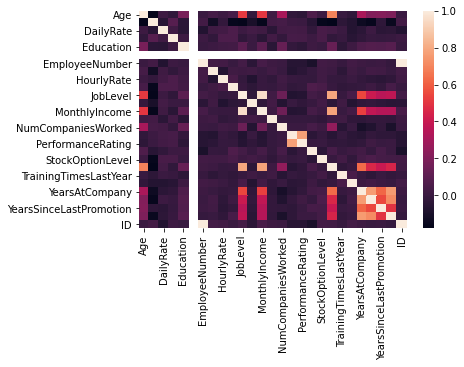

In [76]:
import seaborn as sns
sns.heatmap(atc)

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from IPython.display import display


import csv
from sklearn import preprocessing

import seaborn as sns
from pylab import rcParams
import tensorflow as tf

from sklearn.preprocessing import scale, normalize
from math import *
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [0]:
# load data
df = pd.read_csv('attrition.csv')


# Preprocessing of data

In [0]:
dummy0 = pd.get_dummies(df.BusinessTravel)
dummy1 = pd.get_dummies(df.Department)
dummy2 = pd.get_dummies(df.EducationField)
dummy3 = pd.get_dummies(df.Gender)
dummy4 = pd.get_dummies(df.JobRole)
dummy5 = pd.get_dummies(df.MaritalStatus)
dummy6 = pd.get_dummies(df.OverTime)

In [81]:
merged =pd.concat([df,dummy0,dummy1,dummy2,dummy3,dummy4,dummy5,dummy6],axis='columns')
display(merged)
final = merged.drop(['BusinessTravel','Department','EducationField','EmployeeCount','EmployeeNumber','Gender','JobRole','MaritalStatus','OverTime','ID'],axis= 'columns')
display(final)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Female,Male,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,No,Yes
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,0,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0,1023,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1024,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6,1024,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1025,24,0,Travel_Rarely,1476,Sales,4,1,Medical,1,1445,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3,1025,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1026,32,0,Travel_Rarely,601,Sales,7,5,Marketing,1,1446,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3,1026,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Female,Male,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,No,Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,0,1255,1,2,1,90,3,1,1,2066,10494,2,22,4,4,1,5,3,4,3,2,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1024,47,0,359,2,4,1,82,3,4,3,17169,26703,3,19,3,2,2,26,2,4,20,17,5,6,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1025,24,0,1476,4,1,4,42,3,2,3,4162,15211,1,12,3,3,2,5,3,3,5,4,0,3,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1026,32,0,601,7,5,4,97,3,2,4,9204,23343,4,12,3,3,1,7,3,2,4,3,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [82]:
X = final.drop(['Attrition'],axis= 'columns')
Y = final[['Attrition']]

# encode = LabelEncoder()
print('Original Features: \n',list(X.columns),'\n')


Original Features: 
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel', 'Travel_Frequently', 'Travel_Rarely', 'Human Resources', 'Research & Development', 'Sales', 'Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male', 'Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative', 'Divorced', 'Married', 'Single', 'No', 'Yes'] 



# XGBClassifier training and testing

In [83]:
#Normalizing X
cols = []
count = 1
for column in X.columns:
    if column == 'Human Resources':
        cols.append(f'Human Resources{count}')
        count+=1
        continue
    cols.append(column)
X.columns = cols

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

# display(X)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test0, y_train, y_test0 = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_test, X_test1, y_test, y_test1 = train_test_split(X_test0, y_test0, test_size=0.2, random_state=seed)

# # fit model no training data For XGBoost


classifier = XGBClassifier(
 learning_rate =0.1,
 n_estimators=10000,
 max_depth=25,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=7)
classifier.fit(X_train,y_train)

y_predXG = classifier.predict(X_test)
predictionsXG = [round(value) for value in y_predXG]
# evaluate predictions
accuracy = accuracy_score(y_test, predictionsXG)
print(classification_report(y_test, predictionsXG))
print(confusion_matrix(y_test, predictionsXG))
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(predictionsXG)
display(y_predXG)

print("\n \n \n")





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.90      0.93      0.92       227
           1       0.59      0.49      0.54        45

    accuracy                           0.86       272
   macro avg       0.75      0.71      0.73       272
weighted avg       0.85      0.86      0.85       272

[[212  15]
 [ 23  22]]
Accuracy: 86.03%
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0])

# Logistic regression training and testing

In [84]:
#Now the model of Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
 
predictionsLR = logmodel.predict(X_test)
print(classification_report(y_test, predictionsLR))
print(confusion_matrix(y_test, predictionsLR))
print('Accuracy :',end=" ")
print(accuracy_score(y_test, predictionsLR)*100)
display(predictionsLR)
print("\n \n \n")

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       227
           1       0.62      0.44      0.52        45

    accuracy                           0.86       272
   macro avg       0.76      0.70      0.72       272
weighted avg       0.85      0.86      0.85       272

[[215  12]
 [ 25  20]]
Accuracy : 86.39705882352942


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

# Random Forest training and testing

In [85]:
# Now using Random forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42,max_depth=100)
# Train the model on training data
rf.fit(X_train, y_train);


predictionsRF = rf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",100*metrics.accuracy_score(y_test, predictionsRF.round()))
display(predictionsRF)
print("\n \n \n")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 86.39705882352942


array([0.213, 0.027, 0.092, 0.04 , 0.06 , 0.089, 0.23 , 0.655, 0.08 ,
       0.059, 0.219, 0.294, 0.411, 0.087, 0.295, 0.11 , 0.214, 0.027,
       0.091, 0.138, 0.123, 0.092, 0.151, 0.096, 0.014, 0.257, 0.355,
       0.346, 0.121, 0.184, 0.197, 0.708, 0.065, 0.057, 0.406, 0.106,
       0.062, 0.715, 0.086, 0.192, 0.17 , 0.033, 0.03 , 0.157, 0.264,
       0.444, 0.119, 0.157, 0.317, 0.378, 0.602, 0.117, 0.047, 0.13 ,
       0.191, 0.166, 0.257, 0.12 , 0.434, 0.515, 0.162, 0.397, 0.338,
       0.443, 0.055, 0.247, 0.035, 0.2  , 0.205, 0.128, 0.332, 0.714,
       0.012, 0.631, 0.259, 0.721, 0.167, 0.085, 0.618, 0.09 , 0.2  ,
       0.071, 0.106, 0.295, 0.107, 0.174, 0.433, 0.053, 0.083, 0.264,
       0.046, 0.108, 0.07 , 0.102, 0.714, 0.587, 0.103, 0.155, 0.059,
       0.225, 0.245, 0.16 , 0.228, 0.212, 0.271, 0.04 , 0.419, 0.172,
       0.434, 0.061, 0.494, 0.166, 0.378, 0.504, 0.236, 0.095, 0.062,
       0.016, 0.099, 0.22 , 0.3  , 0.106, 0.136, 0.112, 0.102, 0.081,
       0.291, 0.336,

# SVM Classifier training and testing

In [86]:
# Now using SVM Classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_predSVM = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_predSVM))
print(classification_report(y_test,y_predSVM))
print('Accuracy :',end=" ")
print(accuracy_score(y_test, predictionsLR)*100)
display(y_predSVM)
print("\n \n \n")

[[218   9]
 [ 23  22]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       227
           1       0.71      0.49      0.58        45

    accuracy                           0.88       272
   macro avg       0.81      0.72      0.76       272
weighted avg       0.87      0.88      0.87       272

Accuracy : 86.39705882352942


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

# Neural Network training and testing

In [87]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

#Initializing Neural Network
classifierNN = Sequential()
classifierNN.add(Dense(104, input_dim = 51, activation = 'relu'))
classifierNN.add(Dense(5, activation = 'relu'))
classifierNN.add(Dense(8, activation = 'relu'))
classifierNN.add(Dense(1, activation = 'sigmoid'))

# Compiling Neural Network
classifierNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training our Model
for i in range(0,51):
  for j in range(0,688):
    if X_train.iloc[j,i] < 0.5:
      X_train.iloc[j,i] = -1
classifierNN.fit(X_train, y_train, batch_size = 10, epochs = 1000)

# Predicting the Test set results
y_predNN = classifierNN.predict(X_test)
y_predNN = y_predNN.round()




cm = confusion_matrix(y_test, y_predNN)
print(cm)
print(classification_report(y_test,y_predNN))
print('Accuracy :',end=" ")
print(accuracy_score(y_test, y_predNN)*100)
# display(y_predNN)


print('\n\n\n')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.8212
Epoch 2/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8343
Epoch 3/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8343
Epoch 4/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8445
Epoch 5/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8590
Epoch 6/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8692
Epoch 7/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.2866 - accuracy: 0.8735
Epoch 8/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.2681 - accuracy: 0.8823
Epoch 9/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.2548 - accuracy: 0.8895
Epoch 10/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.2387 - accuracy: 0.9026

In [0]:
y_predNN = y_predNN[:,0]

In [0]:
Xtrain = pd.DataFrame({'XGBoost': predictionsXG, 'LogisticR': predictionsLR,'RandomF' : predictionsRF,'SVM' : y_predSVM, 'NeuralN' : y_predNN})

# Training XGBClassifier on the output of previous classifiers

In [90]:

y_predXG1 = classifier.predict(X_test1)
predictionsXG1 = [round(value) for value in y_predXG1]

predictionsLR1 = logmodel.predict(X_test1)

predictionsRF1 = rf.predict(X_test1)

y_predSVM1 = svclassifier.predict(X_test1)

# for i in range(0,51):
#   for j in range(0,688):
#     if X_test1.iloc[j,i] < 0.5:
#       X_test1.iloc[j,i] = -1
y_predNN1 = classifierNN.predict(X_test1)
y_predNN1 = y_predNN1.round()
y_predNN1 = y_predNN1[:,0]

Xtest1 = pd.DataFrame({'XGBoost': predictionsXG1, 'LogisticR': predictionsLR1,'RandomF' : predictionsRF1,'SVM' : y_predSVM1, 'NeuralN' : y_predNN1})

# Finally here we train a XGBClassifier with the output of the previous classifiers 
classifierF = XGBClassifier()
classifierF.fit(Xtrain,y_test)

y_predF = classifierF.predict(Xtest1)
# predictionsF = [round(value) for value in y_predF]
# evaluate predictions
# predictionsF = predictionsF[:,0]
accuracy = accuracy_score(y_test1, y_predF)
print("Accuracy: %.2f%%" % (accuracy * 100.0))




Accuracy: 85.29%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
